<a href="https://colab.research.google.com/github/JHL5495/Section1_Project/blob/main/Section1%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1
import pandas as pd # 라이브러리 실행
import numpy as np  
import matplotlib.pyplot as plt 

In [ ]:
# 2
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv') # csv 파일 불러오기
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 3
con = df[df['NA_Sales'].str.contains('M|K')| df['EU_Sales'].str.contains('M|K') | df['JP_Sales'].str.contains('M|K') | df['Other_Sales'].str.contains('M|K')].index
df1 = df.drop(con) # 출고량 열에서 'M','K'와 같은 문자가 포함되어 있는 행 제거  
df1

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 4
df1[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]] = df1[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].apply(pd.to_numeric)
df1.info() # 출고량 열을 실수형 데이터로 변환

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15813 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   15813 non-null  int64  
 1   Name         15813 non-null  object 
 2   Platform     15813 non-null  object 
 3   Year         15559 non-null  float64
 4   Genre        15765 non-null  object 
 5   Publisher    15756 non-null  object 
 6   NA_Sales     15813 non-null  float64
 7   EU_Sales     15813 non-null  float64
 8   JP_Sales     15813 non-null  float64
 9   Other_Sales  15813 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.3+ MB


In [ ]:
# 5
con1 = df1[df1['Year'] <= 1900].index  
df2 = df1.drop(con1) # 년도가 1900 이하인 행 제거
df2

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 6
df3 = df2.dropna() # 결측치가 있는 행 제거 
df3

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 7
df4 = df3.reset_index(drop = True) # 인덱스 재정렬 
df4

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...
15377,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
15378,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
15379,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
15380,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 8
temp_genre = df4[['Genre','NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']] # 게임 장르, 나라별 출고량 열 추출 
temp_genre.columns = ['Genre','NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']
temp_grouped = temp_genre.groupby(['Genre']).sum() 
temp_table = temp_grouped.reset_index()

temp_table.columns = ['Genre','NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']
temp_table.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,801.89,486.60,149.85,176.14
1,Adventure,97.29,60.65,49.20,16.06
2,Fighting,210.51,94.18,82.58,34.33
3,Misc,380.36,200.14,99.47,69.97
4,Platform,410.96,184.11,121.88,47.88


In [ ]:
# 9
temp_melted = pd.melt(temp_table, id_vars=['Genre'], value_vars = temp_table.columns[1:], var_name='country of sale', value_name='sales rate') # tidy data 생성 
temp_melted.head()

,Genre,country of sale,sales rate
0,Action,NA_Sales,801.89
1,Adventure,NA_Sales,97.29
2,Fighting,NA_Sales,210.51
3,Misc,NA_Sales,380.36
4,Platform,NA_Sales,410.96


In [ ]:
# 10
import seaborn as sns

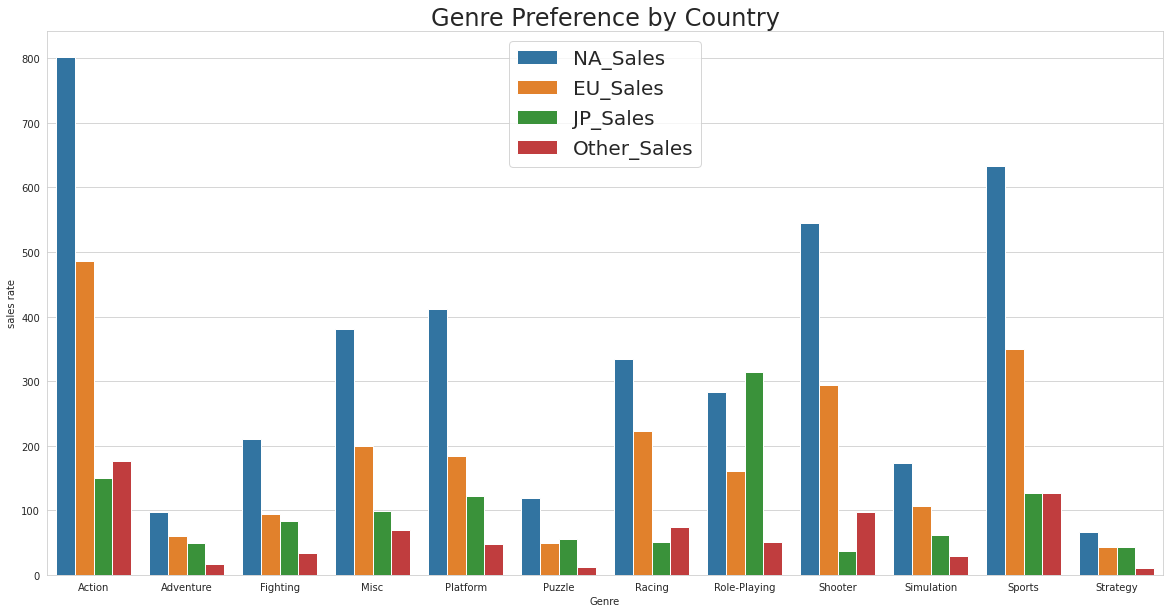

In [ ]:
# 11
plt.figure(figsize=(20,10)) # 모든 지역 게임 장르별 출고량 그래프 (2)
sns.barplot(data=temp_melted, x='Genre', y='sales rate', hue='country of sale')
plt.title("Genre Preference by Country", loc = 'center', fontsize = 24)
plt.legend(fontsize = 20)
plt.show()

In [ ]:
# 12
# 연도별 게임 트렌드 분석
Y_genre = df4.groupby(['Year','Genre'])['NA_Sales'].sum() # 연도 및 게임 장르별 북미 지역 판매량  
Y_genre

Year    Genre       
1980.0  Action           0.32
        Fighting         0.72
        Misc             2.31
        Shooter          6.56
1981.0  Action          12.02
                        ...  
2016.0  Simulation       0.00
        Sports           4.25
        Strategy         0.11
2017.0  Action           0.00
        Role-Playing     0.00
Name: NA_Sales, Length: 386, dtype: float64

In [ ]:
# 13
# 년도별 장르 갯수
year_max_df4 = df4.groupby(['Year', 'Genre']).size().reset_index(name='count')

# 가장 값이 큰 값만 뽑기
year_max_idx = year_max_df4.groupby(['Year'])['count'].transform(max) == year_max_df4['count']
year_max_genre = year_max_df4[year_max_idx].reset_index(drop=True)

# 중복값 제외하기
year_max_genre = year_max_genre.drop_duplicates(subset = ['Year','count'], keep='last').reset_index(drop=True)
year_max_genre[:5]
year_max_genre.columns = ['Year', 'Genre', 'Release volume']

In [ ]:
# 14
# 장르값 할당
genre = year_max_genre['Genre'].values

# 년도별 최고 판매량 기록한 장르 데이터프레임 만들기
df4['Global_Sales'] = df4['NA_Sales'] + df4['EU_Sales'] + df4['JP_Sales'] + df4['Other_Sales'] 
year_max_sales = df4.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index() # 년도별 게임 장르 전세계 판매량 합계 칼럼 구성 및 인덱스 재구성
condition = year_max_sales['Global_Sales'] == year_max_sales.groupby(['Year'])['Global_Sales'].transform(max) # 앞서 구한 판매량 합계 중 최대 판매량 구하는 칼럼 구성 
year_max_sales = year_max_sales[condition] # 전세계 판매량 합계 데이터프레임에 최대 판매량 구하는 칼럼 추가  
year_max_sales.columns = ['Year', 'Genre', 'Worldwide sales'] # 칼럼은 년도, 장르, 전세계 판매량으로 구성
year_max_sales[:5] #  판매량 합계 중 첫 5개 행만 출력 

,Year,Genre,Worldwide sales
3,1980.0,Shooter,7.07
4,1981.0,Action,12.82
14,1982.0,Puzzle,10.04
21,1983.0,Platform,6.93
30,1984.0,Shooter,31.10


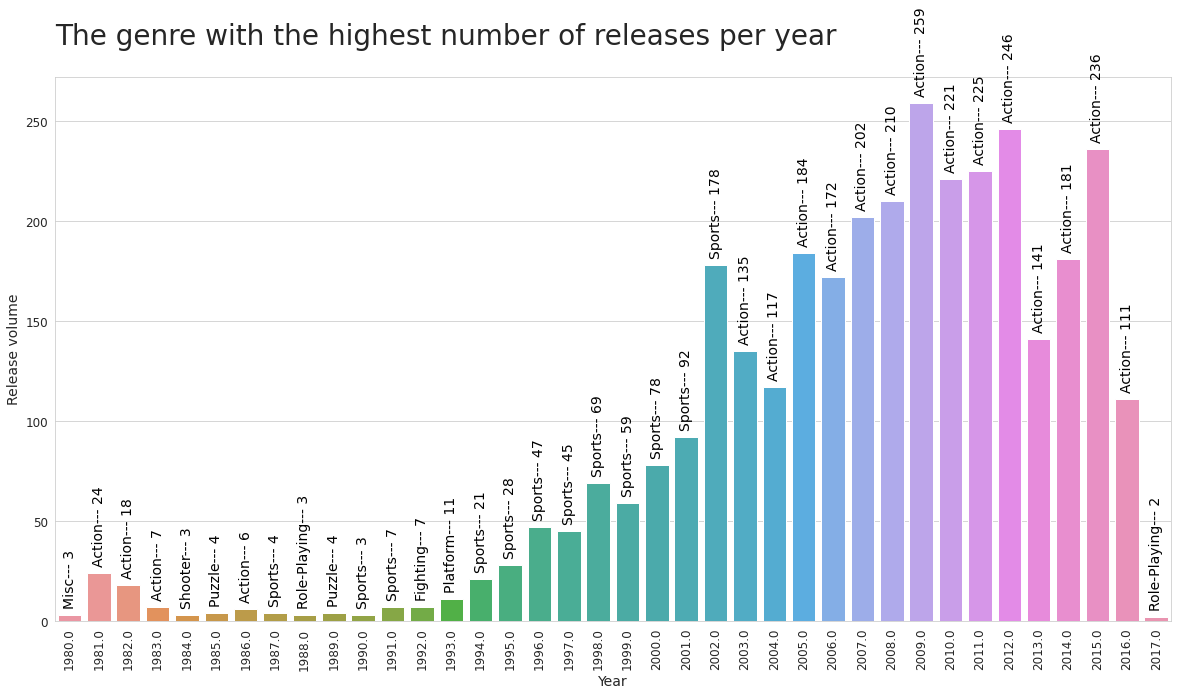

In [ ]:
# 15
# 스타일 변경
sns.set_style('whitegrid') # figure style
plt.figure(figsize=(20,10)) 
ax = sns.barplot(x='Year', y='Release volume', data=year_max_genre) 
idx = 0

for value in year_max_genre['Release volume']: # 판매량 관련하여 반복문 시행 
    ax.text(x=idx, y=value + 5, s = str(genre[idx] + '---' + ' ' + str(value)), # 그래프 내 판매량 내용 스타일 지정
            color='black', size=14, rotation=90, ha='center')
    idx += 1 
plt.xticks(rotation=90, fontsize=12) 
plt.yticks(fontsize=12)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Release volume', fontsize=14) 
ax.set_title('The genre with the highest number of releases per year', fontsize=28, y=1.05, loc='left')
plt.show()

In [ ]:
# 16
# 지역별 플랫폼 선호도 분석
pf_by_sales = df4[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] 
pf_by_sales.columns = ['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'] # 각 지역 판매량 열 구성 
pf_by_sales_grouped = pf_by_sales.groupby(by=['Platform']).sum() # 플랫폼별 판매량 구성 
pf_by_sales_df = pf_by_sales_grouped.reset_index() # 인덱스 재구성 
pf_by_sales_mt = pd.melt(pf_by_sales_df, id_vars=['Platform'], value_vars=pf_by_sales.columns[1:], var_name='country of sale', value_name='sales rate')
pf_by_sales_mt # NA_Sales, EU_Sales, JP_Sales, Other_Sales 열을 행으로 변경 후 country of sale 열에 포함
# sales rate 열에는 pf_by_sales_grouped을 행으로 구성 후 내용 포함  

,Platform,country of sale,sales rate
0,2600,NA_Sales,78.26
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,70.17
3,DC,NA_Sales,5.43
4,DS,NA_Sales,364.67
...,...,...,...
119,Wii,Other_Sales,75.86
120,WiiU,Other_Sales,6.04
121,X360,Other_Sales,76.98
122,XB,Other_Sales,8.01


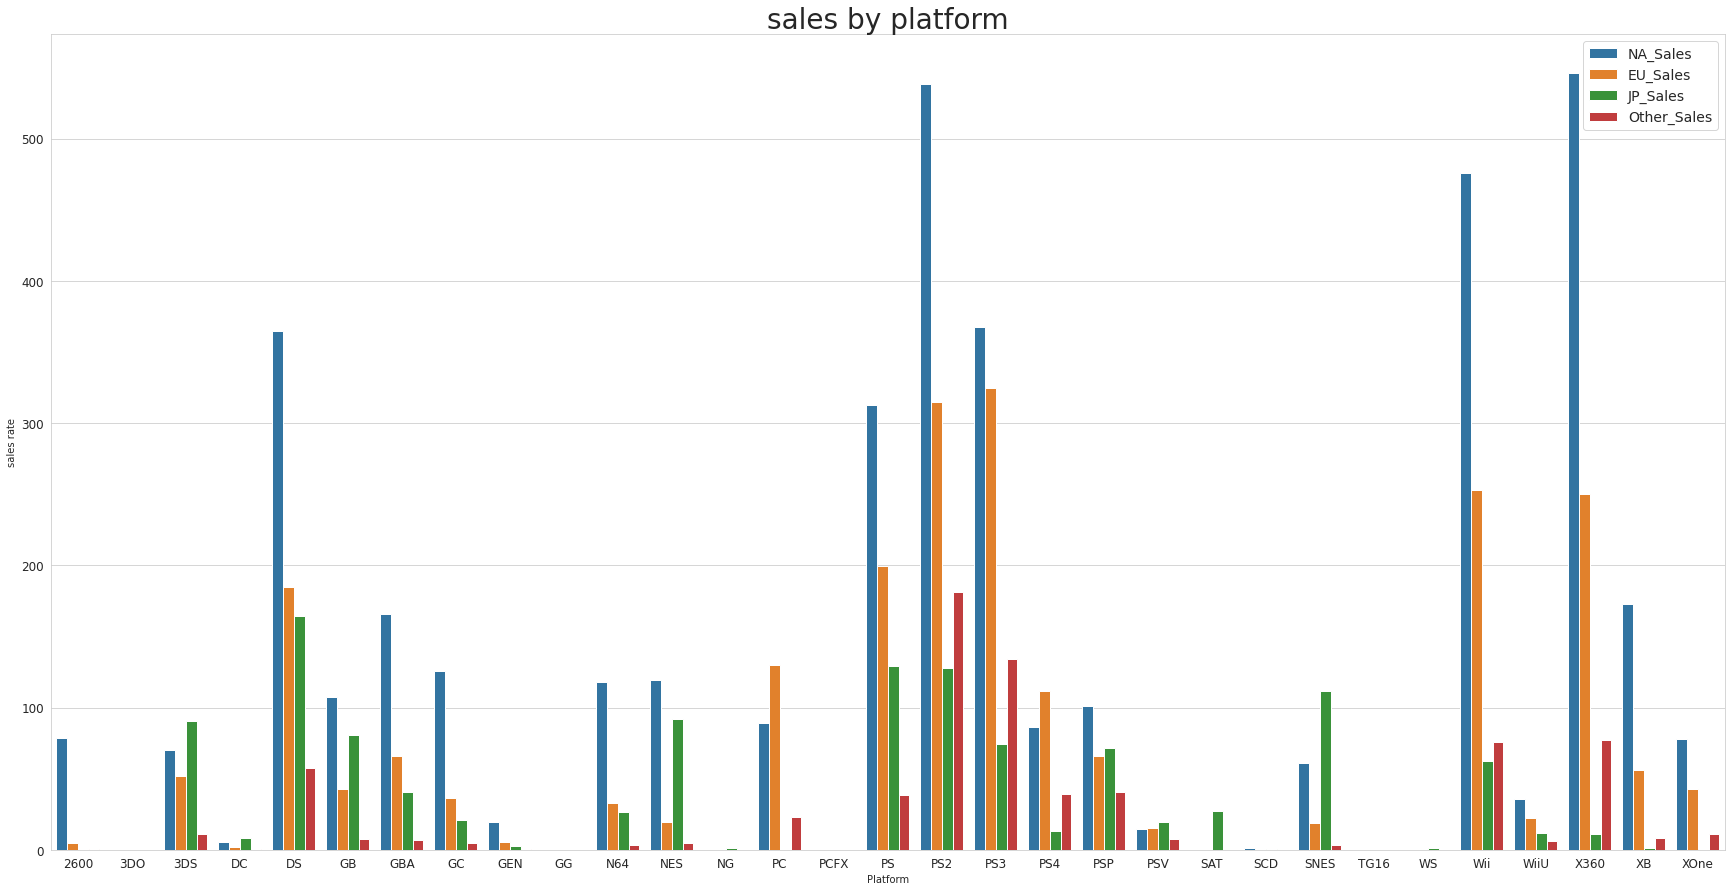

In [ ]:
# 17
plt.figure(figsize=(30,15))
ax = sns.barplot(x='Platform', y='sales rate', hue='country of sale', data=pf_by_sales_mt) 
ax.set_title('sales by platform', fontsize=28) 
ax.legend(fontsize=14) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.show()

In [ ]:
# 18
# 최근 10년간 판매량 TOP10 게임 이름 분석 
year_sales_top_game = df4[df4.Year >= 2011].sort_values('Global_Sales', ascending=False).head(10) # 2011년 이후 게임 판매량 TOP 10 출력 
year_sales_top_game = year_sales_top_game.reset_index(drop=True) 
year_sales_top_game

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,3484,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
1,2810,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
2,9071,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
3,4241,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
4,6394,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.74
5,14121,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.47
6,11124,Mario Kart 7,3DS,2011.0,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21
7,2009,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
8,4252,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
9,12624,Super Mario 3D Land,3DS,2011.0,Platform,Nintendo,4.89,2.99,2.13,0.78,10.79


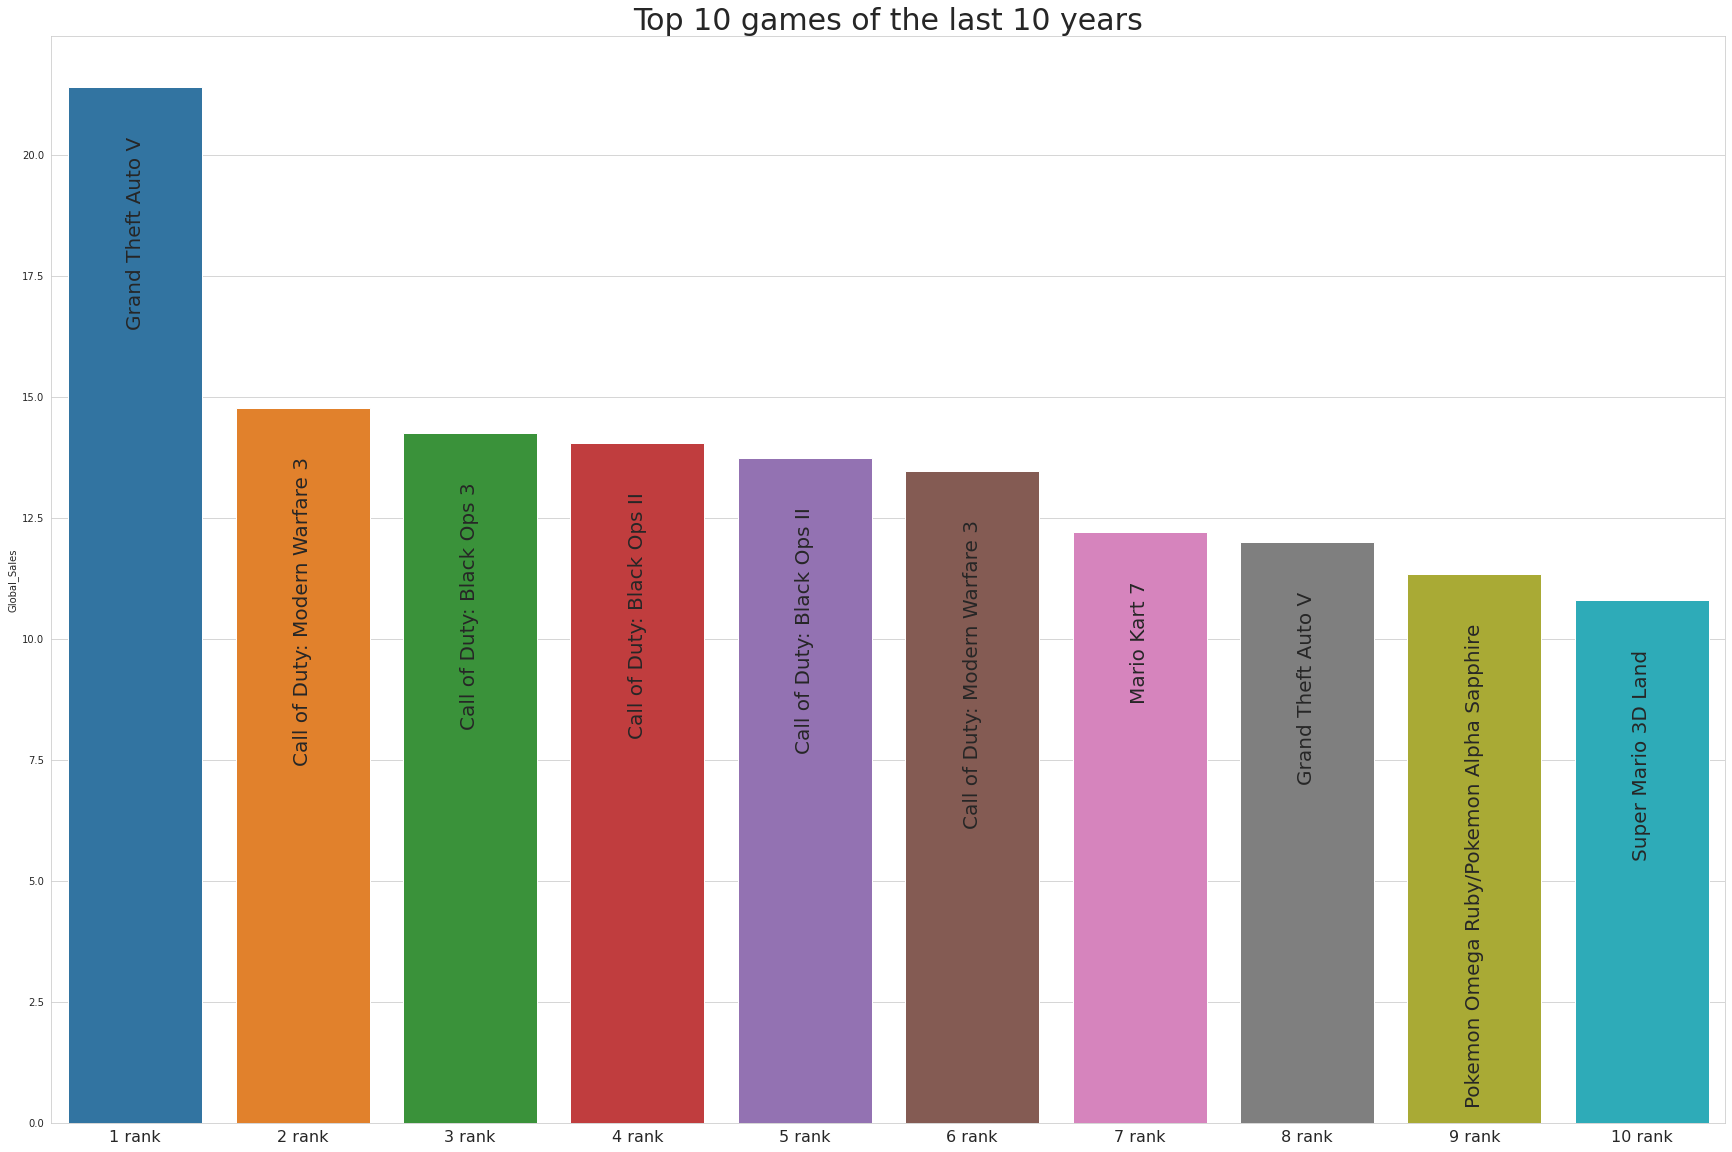

In [ ]:
# 19
plt.figure(figsize=(30, 20)) 
a = sns.barplot(x = year_sales_top_game.index, y='Global_Sales', data=year_sales_top_game) # 최근 10년간 판매량 Top 10 게임 그래프 생성 

i = 0
for name, val in zip(year_sales_top_game.Name, year_sales_top_game.Global_Sales): 

  if val >= 0: 
        a.text(x=i, y=val-1, s=(name), ha='center',va='top', fontsize=20, rotation=90) # 그래프 내 게임 이름 구성 
  else:
        a.text(x=i, y=val+1, s=(name), ha='center', fontsize=20, rotation=90)
        
  i+=1      
a.set_title('Top 10 games of the last 10 years', fontsize=30)
plt.xticks(ticks=[x for x in range(10)], labels=[str(x)+' rank' for x in range(1, 11)], fontsize=16) # x축 레이블 구성 
plt.show()

In [ ]:
# 20
def recent_year_Top3_sales(df4, col, sales):
    return df4.groupby(col)[sales].sum().reset_index(name='sales').sort_values('sales', ascending=False).head(3)

# 최근 10년 플랫폼 판매량 Top3
platform_sales_top3 = recent_year_Top3_sales(year_sales_top_game, 'Platform', 'Global_Sales')
# 최근 10년 장르 판매량 Top3
genre_sales_top3 = recent_year_Top3_sales(year_sales_top_game, 'Genre', 'Global_Sales')

data_list = [platform_sales_top3, genre_sales_top3] # 판매량 데이터를 list 형태로 저장 
titles = ['Top 3 platforms for sales in the last 10 years', 'Top 3 top-selling genres in the last 10 years']
x_labels = ['Platform', 'genre']

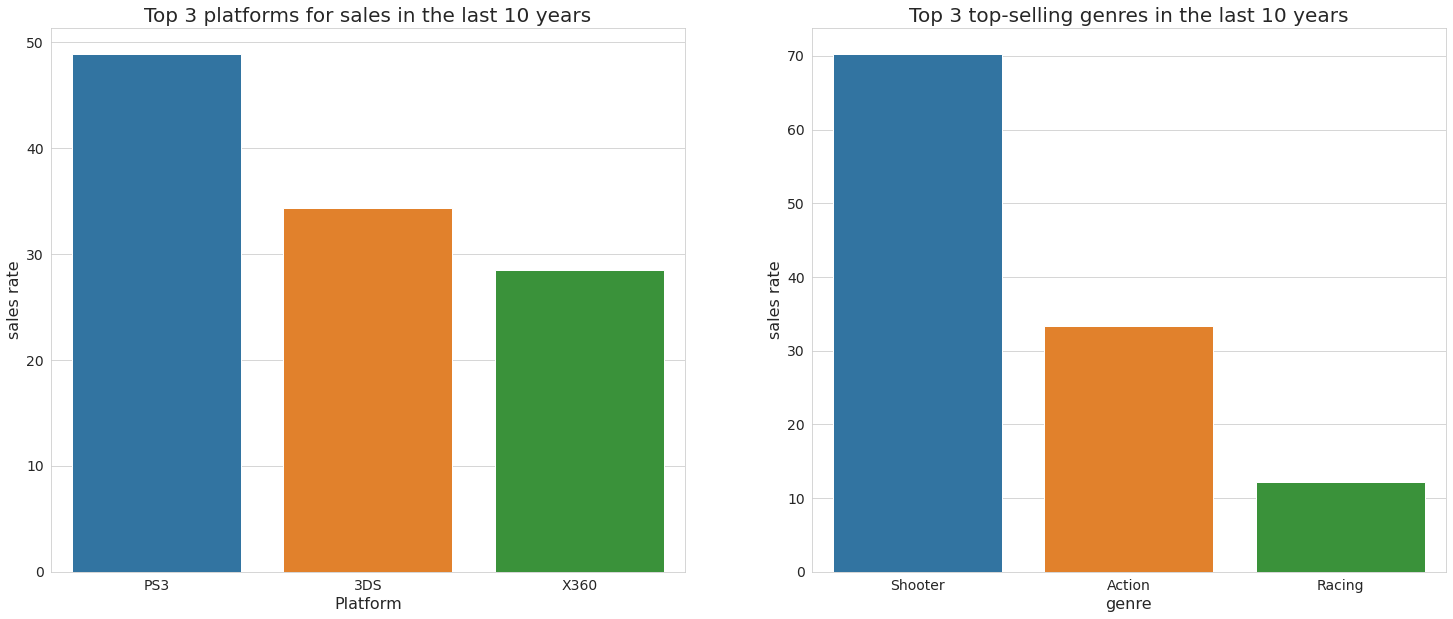

In [ ]:
# 21
fig, axs = plt.subplots(figsize=(25,10), nrows=1, ncols=2)
for i, data, title in zip(range(3), data_list, titles):
    sns.barplot(x=data.iloc[:,0], y=data.iloc[:,1], ax=axs[i])
    axs[i].set_title(titles[i], fontsize=20)
    axs[i].tick_params(labelsize=14)
    axs[i].set_xlabel(x_labels[i], fontsize=16)
    axs[i].set_ylabel('sales rate', fontsize=16)
plt.show()
# 결론: 플레이스테이션 플랫폼을 활용한 액션 장르의 게임을 설계하는 것이 가장 흥행할 가능성이 높다고 판단된다.